### Rejection Sampling

For a given density $p(x)$ we can write

$$p(x)=\int_0^{p(x)}\mathrm{d}u $$

thus, $p(x)$ is the marginal density in $X$ of the joint distribubution of

$$(X,U)\sim \text{Uniform}\{(x,u):0\leq u\leq p(x)\} $$

Unfortunately is not often straight forward to simulate the pair $(X,U)$ without being able to draw from $p(x)$ itself but you could simulate the pair $(X,U)$ on a bigger set, where simulation is easier and take take the pair if the constrain is satisfied.

For instance in the one-dimensional case suppose that $X\sim p(x)$ has support $[a,b]$ and $p(x) < m$. We can then simulate the pair $(Y,U)\sim \text{Uniform}(0\leq u\leq m)$ by simulating $Y\sim U(a,b)$ and $U\sim U(0,m)$ and take only the pairs $(y,u)$ such that the constrain $0\leq u\leq p(y)$ is satisfied. This way the distribution of the accepted $Y$, call it $X$ is $p$ since:

$$P(X\leq x) = P(Y\leq x|U\leq p(Y)) = \frac{\int_a^x\int_0^{p(y)}\mathrm{d}u\mathrm{d}y}{\int_a^b\int_0^{p(y)}\mathrm{d}u\mathrm{d}y} = \int_a^{x}p(y)\mathrm{d}y$$

Moreover, it is easy to see that the probability of acceptance of a given simulation of the box $[a,b]\times[0,m]$ is given by

$$P(\text{Accept})=P(U<p(Y))=\mathbb{E}\left[P(U<p(Y)|Y\right] = \frac{1}{m}\mathbb{E}\left[P(Y)\right] = \frac{1}{m}\int_a^b p(y)\mathrm{d}y=\frac{1}{m} $$

The argument can be further generalize to when the larger set is no longer a box, as long as simulating uniformly over this larger set is feasible. This generalization is important to accommodate distributions with unbounded support and/or unbounded density. The larger set is then of the form

$$A = \{(y,u):0\leq u \leq m(y)\} $$

with the constrain that $p(x)\leq m(x)$ (the set is actually larger than the area under the graph of $p(x)$. 

Notice that because of this constrain $m(y)$ cannot be a density (does not integrate to unity). In practice, we choose an easy-to-sample proposal distribution $q(x)$ that satisfies the "envelope condition"

$$p(x) ≤ Mq(x),\quad M <\infty $$

Hence we can simulate $Y\sim q$ and then $U|Y=y\sim U(0,Mq(y)$ to create the pairs $(y,u)$ and only accept those tha satisfies $u<p(y)$. Recall that the event of acceptance

$$\{U<p(Y)\}=\left\{\frac{U}{Mq(Y)}<\frac{p(Y)}{Mq(Y)}\right\}\equiv\left\{U^*<\frac{p(Y)}{Mq(Y)}\right\}$$

We can sample from a distribution $p(x)$, which is known up to a proportionality constant, by sampling from another easy-to-sample proposal distribution $q(x)$ that satisfies the "envelope condition"



using the accept/reject procedure describe below 

---
**Rejection Sampling Algorithm**

Set $i=1$ and while $i<n$
1. Draw $x^{(i)}\sim q(x)$ and $u\sim U(0,1)$
2. If $u<\frac{p(x^{(i)})}{M q(x^{(i)})}$, accept $x^{(i)}$ and $i=i+1$, otherwise go back to 1.

---

This simple method suffers from severe limitations. It is not always possible to bound $p(x)/q(x)$ with a reasonable constant $M$ over the whole support of $x$. If M is too large, the acceptance probability

  $$P(x \text{ accepted}) = P\left(u<\frac{p(x)}{M q(x)}\right) = \frac{1}{M}$$
  
will be too small. This makes the method impractical in high-dimensional scenarios.

Ideally we want to choose $M$ as close to one as possible since we have a geometric waiting time hence the expected number of trials before getting one accepted sample is $M$. To keep $p/q$ uniformly bounded we have $M\geq 1$ which equality only if $p=q$ and have $q$ with thicker tails than $p$ hence there is no way, for instance, to use a Normal to simulate Cauchy; however the reverse works quite well.

Assume that the posterior density $p(x)$ is only known up to a proportionality constant (which is the case in most situations). Therefore, $p^*(x) = f(x)\pi(x)$ is available where $f$ is the likelihood and $\pi$ is the prior for $x$ but $p(x) = p^*(x)/k$ is not because the value of $k>0$ is unknown. The rejection sampling method work just fine since we can always absorb $k$ into $M$ a define $M^*=kM$.

Acceptance ratio: 0.2780247


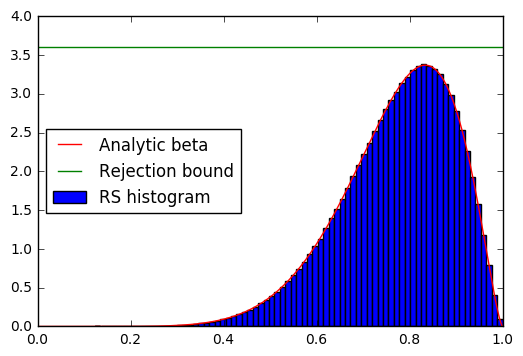

In [1]:
# Example 1: Rejection sampling of beta function
## Envelope function: uniform
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# draws
s =10000000

# target function arguments
n = 10
x = 8
a = x+1/2
b = n-x+1/2

# rejection sampling scaling parameters
M = 3.6

# Rejection sampling
## Choose Y ~ U(0,1) and U ~ U(0,1)
df = pd.DataFrame(index=range(s))
df['Y'] = np.random.uniform(0,1,s) # rv 
df['U'] = np.random.uniform(0,1,s)

# Calculate p(Y) and M*q(Y), and map compliant draws
df['p'] = stats.beta.pdf(df['Y'],a, b) # 
df['q'] = 1 # uniform(0,1)
df['accept'] = df['U'] < df['p']/df['q']/M

## Keep only compliant draws in sample
sample = df.loc[df['accept']==True,'Y']

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

## Plot RS sample
ax.hist(sample, bins=75, normed=True);

## Plot analytic beta
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a, b).pdf(X), 'r');

## Plot rejection sampling bound
ax.plot(X, np.ones(1000)*M, 'g');

# Cleanup
ax.legend(['Analytic beta','Rejection bound','RS histogram'],loc='best');

print('Acceptance ratio: '+str(sample.shape[0]/df.shape[0]))
fig

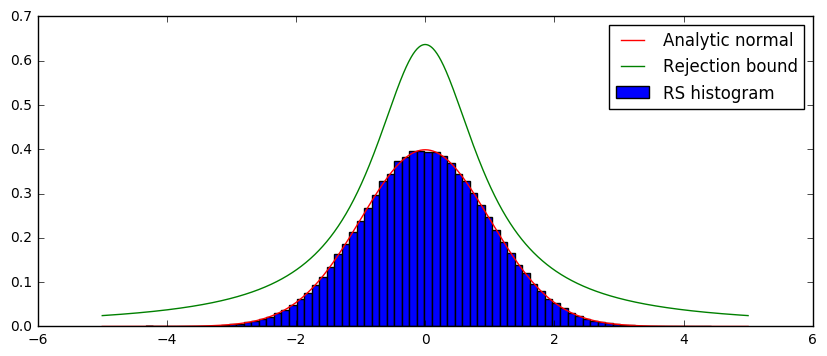

In [2]:
# Example 2: Rejection sampling of normal function
## Envelope function: t
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# draws
s =1000000

# target function arguments
mu = 0
sigma = 1

# envelope function arguments
nu = 1

# rejection sampling scaling parameter
M = 2

# Rejection sampling
## Choose Y ~ t(0,1) and U ~ U(0,1)
df = pd.DataFrame(index=range(s))
df['Y'] = (np.random.standard_t(nu,s) + mu)*sigma # rv 
df['U'] = np.random.uniform(0,1,s)

# Calculate p(Y) and M*q(Y), and map compliant draws
df['p'] = stats.norm(mu,sigma).pdf(df['Y']) 
df['q'] = stats.t(nu).pdf(df['Y'])
df['accept'] = df['U'] < df['p']/df['q']/M

## Keep only compliant draws in sample
sample = df.loc[df['accept']==True,'Y']

# Plot
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

## Plot RS sample
ax.hist(sample, bins=75, normed=True);

## Plot analytic normal
X = np.linspace(-5,5, 1000)
ax.plot(X, stats.norm(mu,sigma).pdf(X), 'r');

## Plot rejection sampling bound
ax.plot(X, stats.t(nu).pdf((X-mu)/sigma)*M, 'g');

# Cleanup
ax.legend(['Analytic normal','Rejection bound','RS histogram'],loc='best');

fig